导入必要的包并检查版本

In [2]:
# check version

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import numpy as np
import pandas as pd
import os,sys,time

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.0
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


使用Numpy生成随机数据并可视化

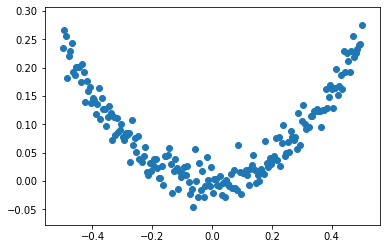

In [3]:
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise
plt.scatter(x_data,y_data)
plt.show()

构建DNN模型
* 调整学习率的方法
默认lr=0.01，首先导入SGD：
    from keras.optimizers import SGD
然后定义一个sgd：
    sgd=SGD(lr=0.1）

In [5]:
'''

'''

#定义模型
#构建一个1-10-1结构的网络
model = keras.models.Sequential([
    keras.layers.Dense(units=10,input_dim=1,activation='tanh'),
    keras.layers.Dense(units=1,input_dim=10,activation='tanh')
])

#定义优化算法
sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd,loss='mse')

训练模型

In [5]:
for step in range(10001):
    cost = model.train_on_batch(x_data,y_data)
    if step%1000==0:
        print("current cost:",cost)

weight,bias = model.layers[0].get_weights()
print("after train, weights is {},bias is {}.".format(weight,bias))


current cost: 0.7541975
current cost: 0.0039644726
current cost: 0.00030095404
current cost: 0.000100378136
current cost: 8.9396686e-05
current cost: 8.879546e-05
current cost: 8.876255e-05
current cost: 8.876075e-05
current cost: 8.876063e-05
current cost: 8.876062e-05
current cost: 8.876062e-05
after train, weights is [[0.09986921]],bias is [0.19841254].


显示出预测结果

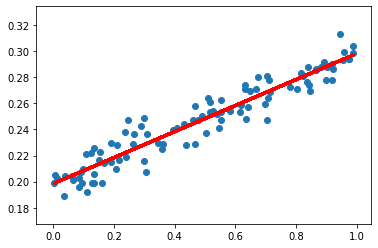

In [6]:
y_predict = model.predict(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_predict,'r-',lw=3)
plt.show()